Реализовать с помощью `Numpy` класс `MyMLP`, моделирующий работу полносвязной нейронной сети.

Реализуемый класс должен

1. Поддерживать создание любого числа слоев с любым числом нейронов. Тип инициализации весов не регламентируется.
2. Обеспечивать выбор следующих функции активации в рамках каждого слоя: `ReLU`, `sigmoid`, `linear`.
3. Поддерживать решение задачи классификации и регрессии (выбор соответствующего лосса, в том числе для задачи многоклассовой классификации).
4. В процессе обучения использовать самостоятельно реализованный механизм обратного распространения (вывод формул в формате markdown) для применения градиентного и стохастического градиентного спусков (с выбором размера батча)
5. Поддерживать использование `l1`, `l2` и `l1l2` регуляризаций.

Самостоятельно выбрать наборы данных (классификация и регрессия). Провести эксперименты (различные конфигурации сети: количество слоев, нейронов, функции активации, скорость обучения и тп. — минимум 5 различных конфигураций) и сравнить результаты работы (оценка качества модели + время обучения и инференса) реализованного класса `MyMLP` со следующими моделям (в одинаковых конфигурациях):

*   MLPClassifier/MLPRegressor из sklearn
*   TensorFlow
*   Keras
*   PyTorch

Результат представить в виде .ipynb блокнота, содержащего весь необходимый код и визуализации сравнения реализаций для рассмотренных конфигураций.


# Выполнение

##Датасеты

Были взяты два разных датасета:

1. [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

Задача: Классификация — доброкачественные/злокачественные опухоли

Характеристики вычисляются на основе оцифрованного изображения тонкоигольного аспирата молочной железы. Они описывают характеристики клеточных ядер, представленных на изображении. n трехмерное пространство - это то, что описано в: [К. П. Беннетт и О. Л. Мангасарян: "Надежное линейное программирование для распознавания двух линейно неразделимых множеств", Методы оптимизации и программное обеспечение 1, 1992, 23-34].




2. [Student Performance (Multiple Linear Regression)](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data).

Задача: Регрессия/Классификация — предсказание успеваемости студентов.

Набор данных об успеваемости учащихся - это набор данных, предназначенный для изучения факторов, влияющих на успеваемость учащихся. Набор данных состоит из 10 000 записей об учениках, каждая запись содержит информацию о различных предикторах и индекс успеваемости.

In [ ]:
import zipfile

dataset_zip_path = "/content/Student_Performance.zip"

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/Student_Performance')

In [ ]:
dataset_zip_path = "/content/Breast_Cancer_Wisconsin.zip"

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/Breast_Cancer_Wisconsin')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

Анализ 1: Breast Cancer Wisconsin (Классификация)

In [ ]:
# Загрузка
cancer_df = pd.read_csv('/content/Breast_Cancer_Wisconsin/data.csv')  # Путь к вашему файлу

# Базовая проверка
print(cancer_df.head())
print(cancer_df.info())
print(cancer_df['diagnosis'].value_counts())

# Преобразование метки класса
cancer_df['diagnosis'] = cancer_df['diagnosis'].map({'M': 1, 'B': 0})

# Удалим ненужные столбцы
cancer_df = cancer_df.drop(['id', 'Unnamed: 32'], axis=1)

# Разделение
X = cancer_df.drop('diagnosis', axis=1)
y = cancer_df['diagnosis']

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделим на train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Оценка
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

Визуализация

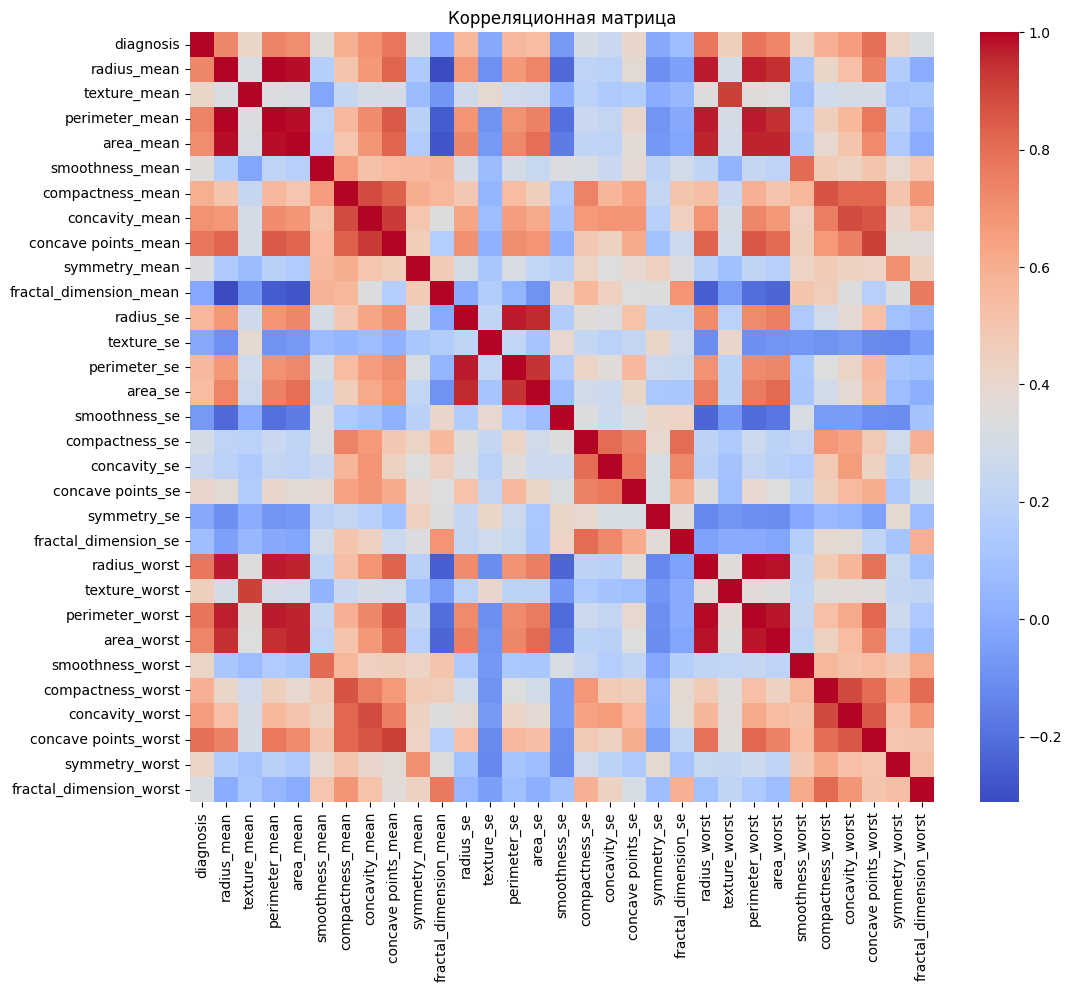

In [ ]:
# Корреляции
plt.figure(figsize=(12,10))
sns.heatmap(cancer_df.corr(), cmap='coolwarm', annot=False)
plt.title("Корреляционная матрица")
plt.show()

Распределение классов

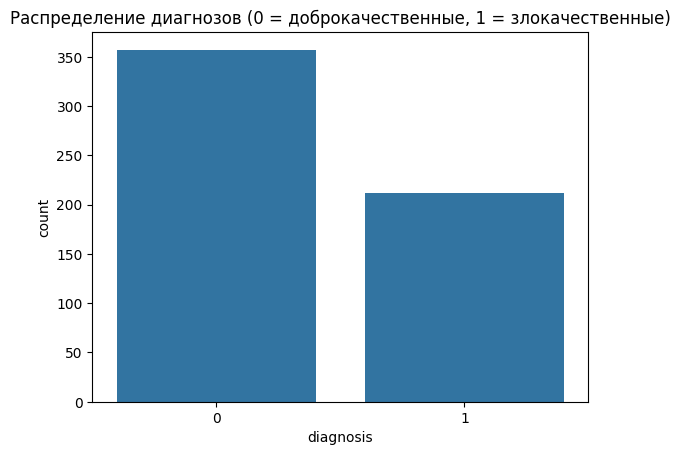

In [ ]:
sns.countplot(x='diagnosis', data=cancer_df)
plt.title("Распределение диагнозов (0 = доброкачественные, 1 = злокачественные)")
plt.show()

 Распределения признаков по классам (например, radius_mean)

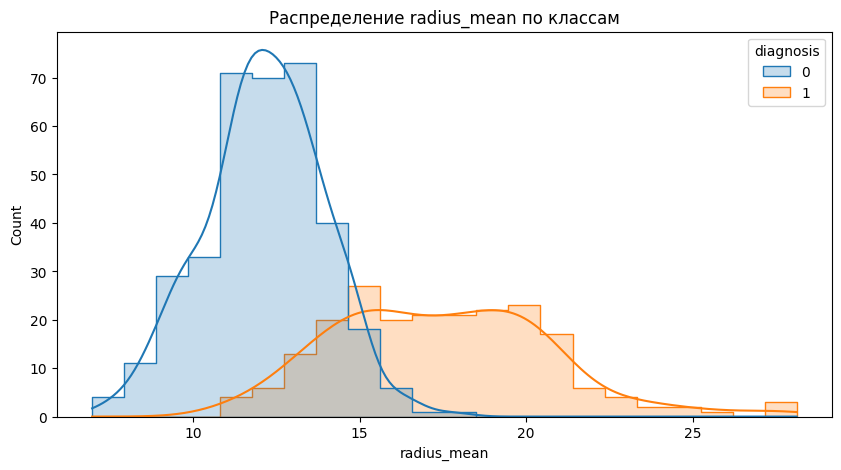

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=cancer_df, x='radius_mean', hue='diagnosis', kde=True, element="step")
plt.title("Распределение radius_mean по классам")
plt.show()

Анализ 2: Student Performance (Регрессия)

In [ ]:
# Загрузка
students_df = pd.read_csv('/content/Student_Performance/Student_Performance.csv')  # Путь к вашему файлу

# Обзор
print(students_df.head())
print(students_df.info())

# Предобработка: закодируем категориальные переменные
students_df = pd.get_dummies(students_df, drop_first=True)

# Разделение
X = students_df.drop('Performance Index', axis=1)
y = students_df['Performance Index']

# Разделение и стандартизация
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Модель линейной регрессии
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)

# Оценка
y_pred = reg_model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------              

Визуализация ошибок регрессии

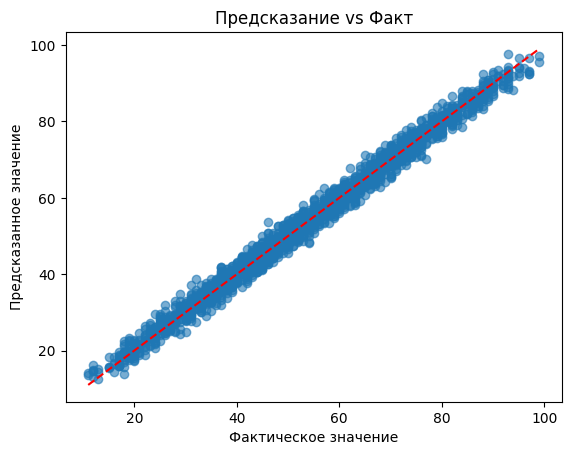

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Фактическое значение")
plt.ylabel("Предсказанное значение")
plt.title("Предсказание vs Факт")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Библиотеки

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, regularizers

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
from sklearn.metrics import f1_score

## Подготовка

In [ ]:
# Define experiment configurations | Определение конфигураций эксперимента
EXPERIMENTS = [
    {'layers': [30, 16, 1], 'activations': ['relu', 'sigmoid'], 'lr': 0.01, 'batch_size': 16, 'reg': 'l2'},
    {'layers': [30, 64, 32, 1], 'activations': ['relu', 'relu', 'sigmoid'], 'lr': 0.001, 'batch_size': 64, 'reg': 'none'},
    {'layers': [30, 128, 64, 32, 1], 'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'lr': 0.005, 'batch_size': None, 'reg': 'l1'},
    {'layers': [30, 32, 1], 'activations': ['linear', 'sigmoid'], 'lr': 0.0005, 'batch_size': 8, 'reg': 'l1l2'},
    {'layers': [30, 100, 50, 10, 1], 'activations': ['relu', 'relu', 'relu', 'sigmoid'], 'lr': 0.01, 'batch_size': 32, 'reg': 'l2'},
]

In [ ]:
# Activation functions and derivatives | Функции активации и производные

In [ ]:
def relu(x):
  return np.maximum(0, x)

In [ ]:
def relu_derivative(x):
  return (x > 0).astype(float)

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
def sigmoid_derivative(x):
  s = sigmoid(x)
  return s * (1 - s)

In [ ]:
def linear(x):
    return x

In [ ]:
def linear_derivative(x):
    return np.ones_like(x)

###Линейная функция
Формула:
$$f(x)=x$$

Производная:
$$f′(x)=1$$

### Sigmoid

Функция активации Sigmoid - это нелинейная функция, которая преобразует входное значение в диапазон от 0 до 1. Преименяется в задачах бинарной классификации, часто используется на последнем слое нейронной сети. Функция определяется следующим образом:

$
\sigma(x) = \frac{1}{1 + e^{-x}}
$

Самостоятельно рассчитайте градиент функции.


Основной недостаток сигмоиды - проблема затухающих градиентов.

При обратном распространении ошибки в глубоких нейронных сетях могут возникать проблемы с затуханием градиентов из-за плато сигмоидальной функции на концах (см. график функции).

Производная:
$$\sigma'(x) = \sigma(x)(1-\sigma(x))$$



Вывод: используем правило производной сложной функции.

### ReLU

Функция активации ReLU (Rectified Linear Unit) представляет собой простую нелинейную функцию, которая определяется следующим образом:

$
\text{ReLU}(x) = \max(0, x)
$

$
\text{ReLU}'(x) = \begin{cases} 1, & \text{если } x > 0 \\ 0, & \text{если } x \leq 0 \end{cases}
$


**Возможные преимущества ReLU:**

1. Вычисление ReLU очень простое и дешевое с вычислительной точки зрения

2. Обычно приводит к разреженным активациям в нейронной сети, что помогает уменьшить переобучение и улучшить обобщающую способность модели

3. ReLU не подвержена проблеме исчезающего градиента, которая может возникнуть при использовании сигмоидной функции активации

**Недостатки ReLU:**

1. Некоторые нейроны могут "умереть" и всегда выдавать ноль, из-за чего они перестают обновляться в процессе обучения. Это происходит, когда весовые суммы нейронов входят в область отрицательных значений и не активируются. В результате обучения такие нейроны могут оставаться неактивными и не приносить пользы

2. ReLU не центрирована относительно нуля

Формула:
$$f(x)=max⁡(0,x)$$

Производная:
$$
f'(x) =
\begin{cases}
1, & \text{если } x > 0 \\
0, & \text{если } x \leq 0
\end{cases}
$$

### ELU

Функция потерь ELU (Exponential Linear Unit) выглядит следующим образом:

$
\text{ELU}(x) =
\begin{cases}
x & \text{если } x \geq 0 \\
\alpha (e^x - 1) & \text{если } x < 0
\end{cases}
$

$\alpha$ - небольшой положительный коффициент, обычно 0.01

Самостоятельно рассчитайте градиент функции.

В отличие от ReLU, которая обнуляет все отрицательные значения, ELU сохраняет небольшой градиент для отрицательных значений, что может помочь в предотвращении проблемы "мертвых нейронов", когда нейрон перестаёт обновляться из-за постоянно отрицательного входа.

Однако обратной стороной медали является возрастание вычислительной сложности.

### Softmax

Функция активации Softmax используется в многоклассовой классификации в нейронных сетях. Она преобразует вектор реальных чисел в вектор вероятностей, где каждый элемент находится в диапазоне от 0 до 1 и сумма всех элементов равна 1.

Говоря более математическим языком, Softmax преобразует входной вектор $z$ в вероятностное распределение через нормализацию экспоненты каждого элемента вектора. Пусть $z$ - входной вектор размерности $(1, p)$, где $p$ - количество классов. Тогда Softmax определяется следующим образом:

$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{p} e^{z_j}} \quad \text{для } i = 1, 2, ..., p
$

Где $z_i$ - i-ый элемент входного вектора $z$.

$
\frac{\partial \text{Softmax}(z_i)}{\partial z_j} = \text{Softmax}(z_i) \cdot (\delta_{ij} - \text{Softmax}(z_j))
$

Где $\delta_{ij}$ - символ Кронекера, который равен 1, если $i = j$, и 0 в противном случае.

**Примечание**

Сигмоида и Softmax чаще используются именно на выходном слое нейросети в задачах классификации - ими предсказывают вероятности принадлежности объектов к одному из классов, в то время как остальные рассмотренные функции активации используются внутри нейросети, то есть в скрытых слоях.

### Функция потерь

Функции потерь (loss functions) в нейронных сетях, как и в любых других алгоритмах машинного обучения, представляют собой метрики, которые используются для оценки того, насколько хорошо модель выполняет свою задачу во время обучения. Они измеряют расхождение между предсказанными значениями модели и фактическими значениями (целевыми), которые она пытается предсказать. Функции потерь выражаются в виде числового значения, которое показывает, насколько сильно модель ошибается на конкретном наборе данных.

Выбор правильной функции потерь зависит от типа задачи, которую решает нейронная сеть. Например, для задач регрессии часто используется среднеквадратичная ошибка (MSE), а для задач классификации - бинарная или категориальная кросс-энтропия.

Цель обучения нейронной сети состоит в минимизации функции потерь путем коррекции весов и смещений сети в процессе обратного распространения ошибки. Чем меньше значение функции потерь, тем лучше модель обучается предсказывать целевые значения.

In [ ]:
# Loss functions | Функция потерь
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-8, 1 - 1e-8)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_derivative(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-8, 1 - 1e-8)
    return (y_pred - y_true) / (y_pred * (1 - y_pred) * y_true.size)

In [ ]:
def regularization(weights, reg_type='l2', alpha=0.01):
    if reg_type == 'l1':
        return alpha * np.sum([np.sum(np.abs(w)) for w in weights])
    elif reg_type == 'l2':
        return alpha * np.sum([np.sum(w**2) for w in weights])
    elif reg_type == 'l1l2':
        return alpha * np.sum([np.sum(np.abs(w)) + np.sum(w**2) for w in weights])
    return 0

#### MSE

Функция потерь MSE (Mean Squared Error) применяется в задачах регресии.

Из-за квадратичного штрафа MSE более чувствительна к большим ошибкам.

Не инвариантна к масштабированию данных, значения могут зависеть от единиц измерения переменных.


$
L(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$


$y_i​$ — истинные значения

$\hat{y}_i$​ — предсказанные значения

$n$ — количество примеров

Ручной вывод производной:
1. Для одного элемента:
$$ℓ_i​=(\hat{y}_i−y_i​)^2$$
2. Найдем производную по $\hat{y}_i$:
$$​dℓ_i/d\hat{y}_i​​=2(\hat{y}_i​−y_i​)$$
3. Для всего набора:
$$​dL/d\hat{y}=\frac{1}{n} \sum_{i=1}^{n}2(\hat{y}_i​−y_i​)=2/n(\hat{y}​−y​)$$

#### Binary Cross-Entropy (LogLoss)

Функция потерь Binary Cross Entropy (BCE), также известная как Log Loss, используется в задачах бинарной классификации.

Она вычисляет степень расхождения между предсказанными вероятностями и истинными метками.

Чувствительна к дисбалансу классов.

$ L(y, \hat{y}) = - \frac{1}{n} \sum_{i=1}^{n} \left( y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right) $



Производная по $\hat{y}_i$​ (то есть по предсказанию):
$$dL/ \hat{y}_i=\frac{\hat{y}_i−y_i}{\hat{y}_i(1-\hat{y}_i)}$$

Вывод:

* Используем правило производной логарифма.
* Для устойчивости добавляется clip, чтобы избежать деления на ноль или логарифма от нуля.

#### Cross-Entropy

В задачах классификации категориальная кросс-энтропия используется как функция потерь для оценки разницы между предсказанными вероятностями классов и истинными метками классов.

Пусть у нас есть $ K $ классов, и для каждого примера $ i $ имеются предсказанные вероятности $ p_{i1}, p_{i2}, ..., p_{iK} $ для каждого класса. И пусть $ y_{ij} $ обозначает индикаторную переменную, которая равна 1, если пример $ i $ относится к классу $ j $, и 0 в противном случае.

Формула для категориальной кросс-энтропии выглядит следующим образом:

$
\text{Cross-entropy} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij} \log(p_{ij})
$

Эта формула измеряет среднюю "удалённость" между истинными метками $ y_{ij} $ и предсказанными вероятностями $ p_{ij} $. Она стремится к нулю, когда предсказанные вероятности близки к истинным меткам для всех примеров.

Градиент мультиклассовой кросс-энтропии по отношению к предсказанным вероятностям вычисляется следующим образом:

$
\frac{\partial \text{Cross-entropy}}{\partial p_{ij}} = -\frac{1}{N} \frac{y_{ij}}{p_{ij}}
$

Градиент показывает, как изменение вероятности $ p_{ij} $ влияет на значение функции потерь. Градиент стремится к бесконечности, когда предсказанная вероятность стремится к 0, и к нулю, когда предсказанная вероятность стремится к 1.

#### Regularization

Функция нужна для вычисления значения регуляризационного штрафа (регуляризации), который добавляется к функции потерь, чтобы избежать переобучения модели.

Регуляризация штрафует слишком большие веса в нейронной сети. Это помогает модели быть менее чувствительной к шуму в обучающем наборе данных и улучшает обобщающую способность.

Параметры функции:

  * weights: список всех весов сети (каждый элемент — это numpy.ndarray, матрица весов одного слоя).

  * reg_type: тип регуляризации:

      * 'l1' — L1-регуляризация (спарсит веса, зануляет лишние).

      * 'l2' — L2-регуляризация (сильно штрафует большие веса).

      * 'l1l2' — комбинация L1 и L2.

  * alpha: коэффициент регуляризации (влияет на силу штрафа).

Как вычисляется:
* L1-регуляризация:
$$Penalty=α⋅∑_{i,j}{∣ w_{ij}∣}$$

* L2-регуляризация:
$$Penalty=α⋅∑_{i,j}w_{ij}^2$$

* L1 + L2: сумма обоих

## TensorFlow

In [ ]:
class MyMLP:
    def init(self, layer_sizes, activations, loss='mse', lr=0.01, reg=None, reg_lambda=0.01):
        self.layer_sizes = layer_sizes
        self.activations = activations
        self.loss = loss
        self.lr = lr
        self.reg = reg
        self.reg_lambda = reg_lambda
        self.params = {}
        self.init_weights()

    def init_weights(self):
        np.random.seed(42)
        self.params['W'] = []
        self.params['b'] = []
        for i in range(len(self.layer_sizes) - 1):
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2. / self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.params['W'].append(w)
            self.params['b'].append(b)

    def _get_activation(self, name):
        return {'relu': relu, 'sigmoid': sigmoid, 'linear': linear}[name]

    def _get_activation_derivative(self, name):
        return {'relu': relu_derivative, 'sigmoid': sigmoid_derivative, 'linear': linear_derivative}[name]

    def forward(self, X):
        a = X
        activations = [a]
        zs = []
        for i in range(len(self.params['W'])):
            z = np.dot(a, self.params['W'][i]) + self.params['b'][i]
            zs.append(z)
            a = self._get_activation(self.activations[i])(z)
            activations.append(a)
        return activations, zs

    def backward(self, X, y, activations, zs):
        grads_W = [None] * len(self.params['W'])
        grads_b = [None] * len(self.params['b'])

        if self.loss == 'mse':
            delta = mse_derivative(y, activations[-1]) * self._get_activation_derivative(self.activations[-1])(zs[-1])
        elif self.loss == 'binary_crossentropy':
            delta = binary_cross_entropy_derivative(y, activations[-1]) * self._get_activation_derivative(self.activations[-1])(zs[-1])

        grads_W[-1] = np.dot(activations[-2].T, delta)
        grads_b[-1] = np.sum(delta, axis=0, keepdims=True)

        for l in range(len(self.params['W']) - 2, -1, -1):
            delta = np.dot(delta, self.params['W'][l + 1].T) * self._get_activation_derivative(self.activations[l])(zs[l])
            grads_W[l] = np.dot(activations[l].T, delta)
            grads_b[l] = np.sum(delta, axis=0, keepdims=True)

            for i in range(len(self.params['W'])):
              if self.reg == 'l2':
                grads_W[i] += self.reg_lambda * self.params['W'][i]
              elif self.reg == 'l1':
                grads_W[i] += self.reg_lambda * np.sign(self.params['W'][i])
              elif self.reg == 'l1l2':
                grads_W[i] += self.reg_lambda * (np.sign(self.params['W'][i]) + self.params['W'][i])

            self.params['W'][i] -= self.lr * grads_W[i]
            self.params['b'][i] -= self.lr * grads_b[i]

    def fit(self, X, y, epochs=100, batch_size=None):
        history = {'loss': []}
        for epoch in range(epochs):
            epoch_loss = 0
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)

            for i in range(0, X.shape[0], batch_size or X.shape[0]):
                batch_idx = indices[i:i + (batch_size or X.shape[0])]
                X_batch, y_batch = X[batch_idx], y[batch_idx]
                activations, zs = self.forward(X_batch)

                if self.loss == 'mse':
                    loss_value = mse(y_batch, activations[-1])
                else:
                    loss_value = binary_cross_entropy(y_batch, activations[-1])

                epoch_loss += loss_value * X_batch.shape[0]
                self.backward(X_batch, y_batch, activations, zs)

            history['loss'].append(epoch_loss / X.shape[0])

        return history

    def predict(self, X):
        a, _ = self.forward(X)
        return a[-1]

# TensorFlow model function

def build_tf_model(input_dim, layer_sizes, activation_funcs):
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    for size, act in zip(layer_sizes[:-1], activation_funcs[:-1]):
        model.add(layers.Dense(size, activation=act))
    model.add(layers.Dense(layer_sizes[-1], activation=activation_funcs[-1]))
    return model

# Step 2: Load and preprocess the datasets

# Dataset 1: Breast Cancer Wisconsin (Classification)
bc_data = pd.read_csv('/content/Breast_Cancer_Wisconsin/data.csv')

bc_data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True, errors='ignore')
bc_data['diagnosis'] = LabelEncoder().fit_transform(bc_data['diagnosis'])
X_bc = StandardScaler().fit_transform(bc_data.drop('diagnosis', axis=1))
y_bc = bc_data['diagnosis'].values.reshape(-1, 1)
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

# Dataset 2: Student Performance (Regression)
stud_data = pd.read_csv('/content/Student_Performance/Student_Performance.csv')
print(stud_data.head())
stud_data = stud_data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']]
stud_data['Extracurricular Activities'] = stud_data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X_stud = StandardScaler().fit_transform(stud_data.drop('Performance Index', axis=1))
y_stud = stud_data['Performance Index'].values.reshape(-1, 1)
X_stud_train, X_stud_test, y_stud_train, y_stud_test = train_test_split(X_stud, y_stud, test_size=0.2, random_state=42)

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


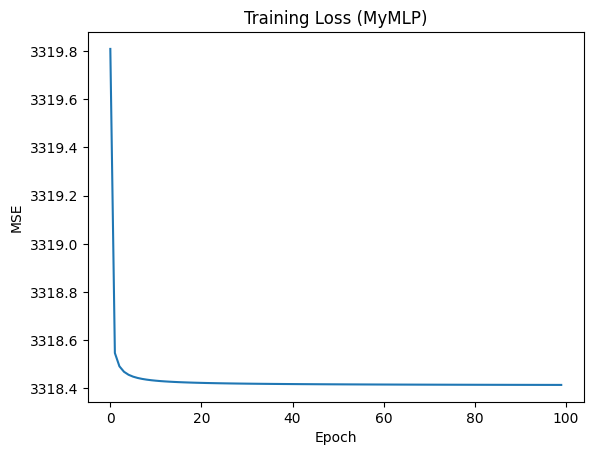

MyMLP Test MSE: 3273.4264529207944


In [ ]:
# Select the first experiment config for regression (sigmoid output for regression is unusual, but let's use it for now)
exp = {'layers': [5, 2, 1], 'activations': ['relu', 'sigmoid'], 'lr': 0.01, 'batch_size': 16, 'reg': 'l2'}

mlp = MyMLP()
mlp.init(
    layer_sizes=exp['layers'],
    activations=exp['activations'],
    loss='mse',          # For regression, use 'mse'
    lr=exp['lr'],
    reg=exp['reg'],
    reg_lambda=0.01
)

# Train the model
history = mlp.fit(X_stud_train, y_stud_train, epochs=100, batch_size=exp['batch_size'])

# Plot training loss
plt.plot(history['loss'])
plt.title('Training Loss (MyMLP)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

# Evaluate on test set
y_pred_mlp = mlp.predict(X_stud_test)
print("MyMLP Test MSE:", mean_squared_error(y_stud_test, y_pred_mlp))

## PyTorch

Student_Performance

In [ ]:
data = pd.read_csv('/content/Student_Performance/Student_Performance.csv')
data = data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours',
             'Sample Question Papers Practiced', 'Performance Index']]
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Преобразование
X = data.drop('Performance Index', axis=1).values
y = data['Performance Index'].values.reshape(-1, 1)

# Масштабирование
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Torch Tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# Dataset and Dataloader
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [ ]:
class TorchMLP(nn.Module):
    def __init__(self, input_dim, layer_sizes, activations):
        super(TorchMLP, self).__init__()
        layers = []
        last_size = input_dim

        for size, act in zip(layer_sizes, activations):
            layers.append(nn.Linear(last_size, size))
            if act == 'relu':
                layers.append(nn.ReLU())
            elif act == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif act == 'linear':
                pass  # Linear = no activation
            last_size = size

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [ ]:
def train_model(model, dataloader, loss_fn, optimizer, epochs=100):
    model.train()
    losses = []
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in dataloader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * X_batch.size(0)
        avg_loss = total_loss / len(dataloader.dataset)
        losses.append(avg_loss)
    return losses

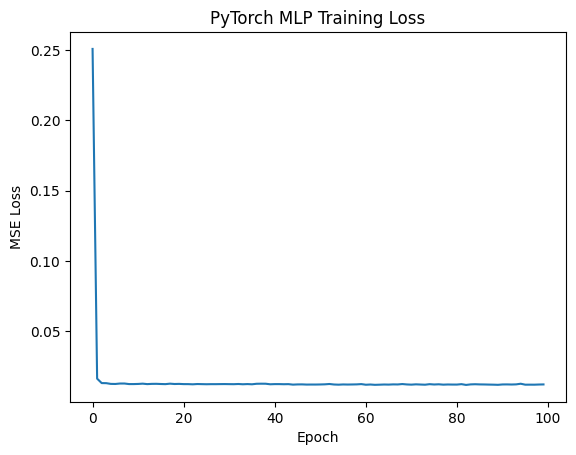

In [ ]:
# Конфигурация
input_dim = X_train.shape[1]
layer_config = [2, 1]  # можно менять на любую конфигурацию
activations = ['relu', 'linear']  # для регрессии последний слой — linear

model = TorchMLP(input_dim, layer_config, activations)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

start_time = time.time()
losses = train_model(model, train_loader, loss_fn, optimizer, epochs=100)
training_time = time.time() - start_time

# Визуализация
plt.plot(losses)
plt.title('PyTorch MLP Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t).numpy()
    y_pred_inv = scaler_y.inverse_transform(y_pred)
    y_test_inv = scaler_y.inverse_transform(y_test)

test_mse = mean_squared_error(y_test_inv, y_pred_inv)
print("PyTorch MLP Test MSE:", test_mse)
print("Training time: {:.4f} seconds".format(training_time))

PyTorch MLP Test MSE: 5.649939707966744
Training time: 62.6197 seconds


Breast Cancer Classification

In [ ]:
bc_data = pd.read_csv('/content/Breast_Cancer_Wisconsin/data.csv')

# Удаление ненужных столбцов
bc_data = bc_data.drop(columns=['id', 'Unnamed: 32'])

# Преобразование целевой переменной
bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})

# Разделение на признаки и цель
X = bc_data.drop('diagnosis', axis=1).values
y = bc_data['diagnosis'].values.reshape(-1, 1)

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Torch тензоры
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# Dataset и DataLoader
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [ ]:
class TorchMLP(nn.Module):
    def __init__(self, input_dim, layer_sizes, activations):
        super(TorchMLP, self).__init__()
        layers = []
        last_size = input_dim

        for size, act in zip(layer_sizes, activations):
            layers.append(nn.Linear(last_size, size))
            if act == 'relu':
                layers.append(nn.ReLU())
            elif act == 'sigmoid':
                layers.append(nn.Sigmoid())
            elif act == 'linear':
                pass  # Без активации
            last_size = size

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [ ]:
def train_model(model, dataloader, loss_fn, optimizer, epochs=100):
    model.train()
    losses = []
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in dataloader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * X_batch.size(0)
        avg_loss = total_loss / len(dataloader.dataset)
        losses.append(avg_loss)
    return losses

In [ ]:
# Конфигурация модели
input_dim = X_train.shape[1]
layer_config = [16, 8, 1]
activations = ['relu', 'relu', 'sigmoid']  # Для классификации

model = TorchMLP(input_dim, layer_config, activations)
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
start_time = time.time()
losses = train_model(model, train_loader, loss_fn, optimizer, epochs=100)
training_time = time.time() - start_time

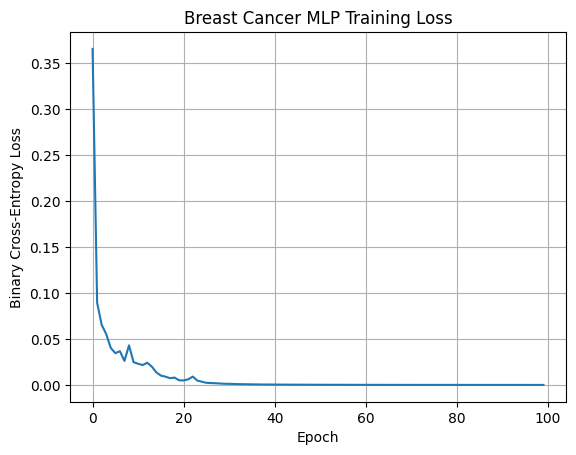

In [ ]:
plt.plot(losses)
plt.title('Breast Cancer MLP Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.grid(True)
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t).numpy()
    y_pred_class = (y_pred >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print("Breast Cancer MLP Test Accuracy:", round(acc, 4))
print("Breast Cancer MLP Test F1 Score:", round(f1, 4))
print("Training time:", round(training_time, 4), "seconds")

Breast Cancer MLP Test Accuracy: 0.9737
Breast Cancer MLP Test F1 Score: 0.9655
Training time: 4.5812 seconds


## Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History
from tensorflow.keras.regularizers import l2, l1, l1_l2

In [ ]:
# Function to create Keras model based on experiment config
def create_keras_model(layers, activations, reg_type, lr):
    model = Sequential()
    for i in range(len(layers) - 1):
        if reg_type == 'l1':
            reg = l1(0.01)
        elif reg_type == 'l2':
            reg = l2(0.01)
        elif reg_type == 'l1l2':
            reg = l1_l2(0.01)
        else:
            reg = None

        model.add(Dense(layers[i + 1], activation=activations[i], input_dim=layers[i], kernel_regularizer=reg))

    model.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['accuracy'])
    return model

## MLPClassifier/MLPRegressor из sklearn

In [ ]:
class MyMLP:
    def __init__(self, layer_sizes, activations, task='regression', lr=0.01, reg=None, alpha=0.001, batch_size=32):
        self.layer_sizes = layer_sizes
        self.activations = activations
        self.task = task
        self.lr = lr
        self.reg = reg
        self.alpha = alpha
        self.batch_size = batch_size
        self.weights = []
        self.biases = []
        self.init_weights()

        self.activation_map = {
            'relu': (relu, relu_deriv),
            'sigmoid': (sigmoid, sigmoid_deriv),
            'linear': (linear, linear_deriv),
        }

    def init_weights(self):
        for i in range(len(self.layer_sizes) - 1):
            w = np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2 / self.layer_sizes[i])
            b = np.zeros((1, self.layer_sizes[i+1]))
            self.weights.append(w)
            self.biases.append(b)

    def forward(self, X):
        a = X
        activations = [X]
        zs = []
        for i in range(len(self.weights)):
            z = a @ self.weights[i] + self.biases[i]
            zs.append(z)
            a = self.activation_map[self.activations[i]][0](z)
            activations.append(a)
        return activations, zs

    def backward(self, activations, zs, y_true):
        grads_w = [0] * len(self.weights)
        grads_b = [0] * len(self.biases)

        if self.task == 'regression':
            delta = mse_deriv(y_true, activations[-1]) * self.activation_map[self.activations[-1]][1](zs[-1])
        else:
            delta = bce_deriv(y_true, activations[-1]) * self.activation_map[self.activations[-1]][1](zs[-1])

        grads_w[-1] = activations[-2].T @ delta
        grads_b[-1] = np.sum(delta, axis=0, keepdims=True)

        for l in range(2, len(self.layer_sizes)):
            z = zs[-l]
            delta = (delta @ self.weights[-l+1].T) * self.activation_map[self.activations[-l]][1](z)
            grads_w[-l] = activations[-l-1].T @ delta
            grads_b[-l] = np.sum(delta, axis=0, keepdims=True)

        return grads_w, grads_b

    def update_weights(self, grads_w, grads_b):
        for i in range(len(self.weights)):
            if self.reg == 'l1':
                self.weights[i] -= self.lr * (grads_w[i] + self.alpha * np.sign(self.weights[i]))
            elif self.reg == 'l2':
                self.weights[i] -= self.lr * (grads_w[i] + self.alpha * self.weights[i])
            elif self.reg == 'l1l2':
                self.weights[i] -= self.lr * (grads_w[i] + self.alpha * (np.sign(self.weights[i]) + self.weights[i]))
            else:
                self.weights[i] -= self.lr * grads_w[i]
            self.biases[i] -= self.lr * grads_b[i]

    def fit(self, X, y, epochs=100):
        history = []
        start_time = time.time()
        for epoch in range(epochs):
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            for start in range(0, X.shape[0], self.batch_size):
                end = start + self.batch_size
                batch_idx = indices[start:end]
                X_batch, y_batch = X[batch_idx], y[batch_idx]
                activations, zs = self.forward(X_batch)
                grads_w, grads_b = self.backward(activations, zs, y_batch)
                self.update_weights(grads_w, grads_b)
            preds = self.predict(X)
            loss = mse_loss(y, preds) if self.task == 'regression' else bce_loss(y, preds)
            loss += regularization(self.weights, self.reg, self.alpha)
            history.append(loss)
        self.train_time = time.time() - start_time
        return history

    def predict(self, X):
        activations, _ = self.forward(X)
        out = activations[-1]
        if self.task == 'classification':
            return (out > 0.5).astype(int)
        return out

MLPClassifier на Breast Cancer Wisconsin

In [ ]:
def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): s = sigmoid(x); return s * (1 - s)

def linear(x): return x
def linear_deriv(x): return np.ones_like(x)

In [ ]:
import numpy as np
import time

# --- Activation functions ---
def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): s = sigmoid(x); return s * (1 - s)

def linear(x): return x
def linear_deriv(x): return np.ones_like(x)

# --- Loss functions ---
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_deriv(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

def bce_loss(y_true, y_pred, eps=1e-8):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def bce_deriv(y_true, y_pred, eps=1e-8):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return (y_pred - y_true) / (y_pred * (1 - y_pred) * y_true.size)

# --- Regularization ---
def regularization(weights, reg, alpha):
    if reg == 'l1':
        return alpha * sum(np.sum(np.abs(w)) for w in weights)
    elif reg == 'l2':
        return alpha * sum(np.sum(w ** 2) for w in weights)
    elif reg == 'l1l2':
        return alpha * sum(np.sum(np.abs(w) + w**2) for w in weights)
    return 0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Загрузка
df = pd.read_csv('/content/Breast_Cancer_Wisconsin/data.csv')
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Разделение
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values.reshape(-1, 1)

# Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Деление
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Модель
model = MyMLP(layer_sizes=[30, 16, 1], activations=['relu', 'sigmoid'], task='classification', lr=0.01, reg='l2', alpha=0.001, batch_size=32)

# Обучение
history = model.fit(X_train, y_train, epochs=100)

# Оценка
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Custom MLP Classification Accuracy:", acc)

Custom MLP Classification Accuracy: 0.9736842105263158


MLPRegressor на Student Performance

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка
students_df = pd.read_csv('/content/Student_Performance/Student_Performance.csv')

# Кодирование категориальных признаков
students_df = pd.get_dummies(students_df, drop_first=True)

# Разделение
X = students_df.drop('Performance Index', axis=1)
y = students_df['Performance Index']

# Деление и стандартизация
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Модель
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_reg.fit(X_train_scaled, y_train)

# Предсказание
y_pred = mlp_reg.predict(X_test_scaled)

# Метрики
print("MLPRegressor MSE:", mean_squared_error(y_test, y_pred))
print("MLPRegressor R² Score:", r2_score(y_test, y_pred))

MLPRegressor MSE: 4.327498877199827
MLPRegressor R² Score: 0.9883225237864118


<ipython-input-60-bd173c92ce6f>:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  clf.fit(X_train, y_train.ravel())  # обучаем sklearn MLP
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


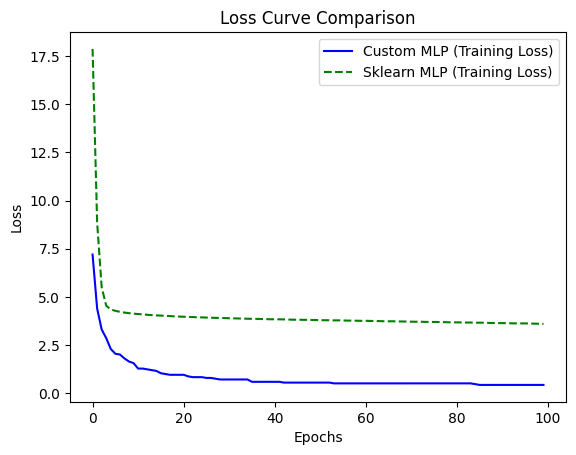

In [ ]:
import matplotlib.pyplot as plt

# 1. Построение графика для кастомной MLP
plt.plot(history, label="Custom MLP (Training Loss)", color='blue')

# 2. Сравнение с MLP из sklearn (например, для классификации)
from sklearn.neural_network import MLPClassifier

# Используем те же данные для sklearn MLP
clf = MLPClassifier(hidden_layer_sizes=(16,), activation='relu', solver='adam', max_iter=100)
clf.fit(X_train, y_train.ravel())  # обучаем sklearn MLP

# Получаем потери
sklearn_loss = clf.loss_curve_

# 3. Добавляем график потерь для sklearn MLP
plt.plot(sklearn_loss, label="Sklearn MLP (Training Loss)", color='green', linestyle='--')

# 4. Настройка графика
plt.title("Loss Curve Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Показываем график
plt.show()